# Project II: Wrangling and Analyze Data
## Author: J.Zakaria


## Data Gathering
In the cells below, we'll gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. We directly download and load the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
main_df = pd.read_csv('twitter-archive-enhanced.csv')

2. We use the Requests library to download and load the tweet image prediction (image_predictions.tsv), [following](https://www.alpharithms.com/downloading-files-with-python-533513/).

In [2]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
data = requests.get(url)
with open('image-predictions.tsv', 'wb')as file:
    file.write(data.content)
    
predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

3. We use the Tweepy library to query additional data via the Twitter API (tweet_json.txt) The tutorials we used in this part: [Scrape Tweets](https://towardsdatascience.com/how-to-scrape-tweets-from-twitter-59287e20f0f1), [Web Scraping](https://www.freecodecamp.org/news/python-web-scraping-tutorial/),[Tweet timelines](https://developer.twitter.com/en/docs/twitter-api/v1/tweets/timelines/api-reference/get-statuses-user_timeline), and [This tutorials for importing json](https://www.statology.org/valueerror-trailing-data/).

In [3]:
tweets_df = pd.read_json("tweet_json.txt", lines=True)

## Assessing Data
In this section, we'll detect and document at least **eight (8) quality issues and two (2) tidiness issue**. We'll  use **both** visual assessment andprogrammatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [4]:
main_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
tweets_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [10]:
main_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [12]:
tweets_df.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


Let's check some samples.

In [13]:
main_df['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [14]:
main_df['expanded_urls'][0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [15]:
main_df['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [16]:
main_df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [17]:
tweets_df['full_text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [18]:
main_df.duplicated().sum(), predictions_df.duplicated().sum(), 

(0, 0)

### Quality issues
1. ID fields: The ID fields, like tweet_id, in_reply_to_status_id etc. should be objects, not integers or floats because they are not numeric and aren't intended to perform calculations.
2. main_df table: The two rating columns need to be float type and not integers.
3. Retweets and Favorite Count: retweet_count and favorite_count should be integers, not floats.
4. main_df table: The text column contain both tweets and retweets.
5. main_df table: NaN values in many columns.
6. main_df table: "None" in name to dog stage columns.
7. main_df table: name column contain error values like 'a', 'by', 'the', 'such'.
8. main_df table: timestamp column in a string datatype, it should be in datetime.
9. main_df table: source column contain the HTML text, we need only the source.
10. tweets_df: we need only tweet_id, retweet and favorite count for each tweet.
11. Completeness Issue: 2356 rows in main_df, 2075 in predictions_df and 2354 in tweets_df.


### Tidiness issues
1. main_df table: dog stage columns "puppo, doggo..." need to be in one column.
2. main_df table: The text column contain both text and links.
3. all the three data sets need to be merged into one dataset and saved.

## Cleaning Data
In this section, we'll clean **all** of the issues we documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [5]:
# Make copies of original pieces of data
main_clean = main_df.copy()
predictions_clean = predictions_df.copy()
count_clean = tweets_df.copy()

### Quality Issue #1: ID fields  

#### Define:
The ID fields, like tweet_id, in_reply_to_status_id etc. should be objects, not integers or floats because they are not numeric and aren't intended to perform calculations.


#### Code:

In [6]:
to_int = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']


for col in to_int:
    main_clean[col] = main_clean[col].astype('str', errors='ignore')

In [7]:
predictions_clean['tweet_id'] = predictions_clean['tweet_id'].astype('str')

In [8]:
count_clean['id'] = count_clean['id'].astype('str')

We have a little trick here and it makes some problems later.

In [9]:
main_clean.replace('nan', np.NaN, inplace=True)

In [10]:
predictions_clean.replace('nan', np.NaN, inplace=True)

In [11]:
count_clean.replace('nan', np.NaN, inplace=True)

#### Test:
The type of our columns is converted.

In [12]:
main_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   object
 1   in_reply_to_status_id       78 non-null     object
 2   in_reply_to_user_id         78 non-null     object
 3   timestamp                   2356 non-null   object
 4   source                      2356 non-null   object
 5   text                        2356 non-null   object
 6   retweeted_status_id         181 non-null    object
 7   retweeted_status_user_id    181 non-null    object
 8   retweeted_status_timestamp  181 non-null    object
 9   expanded_urls               2297 non-null   object
 10  rating_numerator            2356 non-null   int64 
 11  rating_denominator          2356 non-null   int64 
 12  name                        2356 non-null   object
 13  doggo                       2356 non-null   obje

In [13]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [28]:
count_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   object             
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Quality Issue #2: The rating columns in main_df

#### Define:
The two rating columns need to be float type and not integers, because they have decimals.


#### Code:

In [14]:
to_int2 = ['rating_numerator', 'rating_denominator']


for col in to_int2:
    main_clean[col] = main_clean[col].astype('float')

#### Test:
It's float type now.

In [15]:
main_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     object 
 2   in_reply_to_user_id         78 non-null     object 
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    object 
 7   retweeted_status_user_id    181 non-null    object 
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   float64
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Quality Issue #3: Retweets and Favorite Count in tweets_df

#### Define:
retweet_count and favorite_count should be integers, not floats.

#### Code:

In [16]:
to_int3 = ['retweet_count', 'favorite_count']


for col in to_int3:
    count_clean[col] = count_clean[col].astype('int')

#### Test:
They are integers now.

In [32]:
count_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   object             
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Quality Issue #4: text column in main_df    

#### Define:
The text column contain both tweets and retweets (text column starts with RT @), we need to remove the retweets  and let only the tweets. You need to remove all rows that have values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.

One of the ways to remove retweets is to select only rows that have null values in retweet related columns, using [pandas isnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) function. 

#### Code:

In [17]:
main_clean = main_clean[main_clean.retweeted_status_id.isnull()]
main_clean = main_clean[main_clean.retweeted_status_user_id.isnull()]
main_clean = main_clean[main_clean.retweeted_status_timestamp.isnull()]

#### Test:
We removed the retweets from our selection.

In [34]:
main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   object 
 1   in_reply_to_status_id       78 non-null     object 
 2   in_reply_to_user_id         78 non-null     object 
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      object 
 7   retweeted_status_user_id    0 non-null      object 
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   float64
 11  rating_denominator          2175 non-null   float64
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Quality Issue #5: NaN values in main_df

#### Define: 
There are some columns in main_df with few NaN values, and other columns are full of NaN values, we will drop the columns that we don't need ( we indentify these columns in the code below ).

#### Code:
We ll drop them with DataFrame.drop [tutorials](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html).

In [18]:
to_drop = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
main_clean.drop(to_drop, axis=1, inplace=True)

#### Test:
As we see now we have only few NaN values and our data in more clean.

In [36]:
main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   object 
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2175 non-null   float64
 6   rating_denominator  2175 non-null   float64
 7   name                2175 non-null   object 
 8   doggo               2175 non-null   object 
 9   floofer             2175 non-null   object 
 10  pupper              2175 non-null   object 
 11  puppo               2175 non-null   object 
dtypes: float64(2), object(10)
memory usage: 220.9+ KB


### Quality Issue #6: "None" in main_df columns

#### Define:
The last columns of the main_df contain many "None" values on them, so we need to ocnvert them into np.nan. 

#### Code:

In [19]:
to_clean = ['name','doggo','floofer','pupper','puppo']

for col in to_clean:
    main_clean[col].replace('None', np.NaN, inplace=True)

#### Test:
It seems we have a large amount of NaN values in these columns, this is why np.NaN is powerful.

In [38]:
main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   object 
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2175 non-null   float64
 6   rating_denominator  2175 non-null   float64
 7   name                1495 non-null   object 
 8   doggo               87 non-null     object 
 9   floofer             10 non-null     object 
 10  pupper              234 non-null    object 
 11  puppo               25 non-null     object 
dtypes: float64(2), object(10)
memory usage: 220.9+ KB


### Quality Issue #7: name column contain error values like 'a', 'by', 'the', 'such'...

#### Define:
From our assessement of data we observed error values in the name column like a, by so we need to clean them. Notice that all of these observations have lowercase characters, an important pattern that could be used to clean up this field. Another way is to drop duplicated values.

#### Code:
Seems we have more than just 'a' and 'by'. Let's drop them. [avoid search error](https://www.statology.org/cannot-mask-with-non-boolean-array-containing-na-nan-values/#:~:text=2022%20by%20Zach-,How%20to%20Fix%3A%20ValueError%3A%20Cannot%20mask%20with%20non%2Dboolean,array%20containing%20NA%20%2F%20NaN%20values&text=This%20error%20usually%20occurs%20when,searching%20in%20has%20NaN%20values.).

In [20]:
t = main_clean[main_clean.name.str.islower().fillna(False)]
t.name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [21]:
to_rm = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space']

for word in to_rm:
    main_clean = main_clean[main_clean["name"].str.contains(word)==False]

#### Test:
It's good now, there is no "a" or "by" or any other lowercase strings.

In [41]:
t = main_clean[main_clean.name.str.islower()]
t.name.unique()

array([], dtype=object)

### Quality Issue #8: timestamp column in main_df

#### Define:
It type is string rather than datetime, so we need to change it into datetime and extract the format that we need.

#### Code:
We use [this tutorial](https://datascientyst.com/extract-month-and-year-datetime-column-in-pandas/).

In [22]:
main_clean['timestamp'] = pd.to_datetime(main_clean['timestamp']).dt.strftime('%d-%m-%Y')

#### Test:
It's in day, month, year datetime format as we want.

In [43]:
main_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,01-08-2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,31-07-2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,NaN
8,890609185150312448,27-07-2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,NaN,NaN,NaN


### Quality Issue #9: source column in main_df

#### Define:
It contain the HTML format, so we need to extract only the source from the html.

#### Code:
We split the text using this [tutorial](https://stackoverflow.com/questions/69756836/extract-words-within-a-string-and-store-as-a-column). But We still have the </a problem and some words in the data, let's just replace it with replace method. following [this tutorial](https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-string-column-of-a-pandas-dataframe). Then let's capitalize the first words using [this method](https://www.geeksforgeeks.org/pandas-convert-the-first-and-last-character-of-each-word-to-upper-case-in-a-series/#:~:text=list%20to%20string-,Pandas%20%E2%80%93%20Convert%20the%20first%20and%20last%20character%20of%20each%20word,upper%20case%20in%20a%20series&text=In%20python%2C%20if%20we%20wish,using%20the%20upper()%20method.).


In [23]:
# split
main_clean["source"] = main_clean["source"].str.split(">").str[1]

In [24]:
# replace
to_replace = ["</a", "Twitter for ", "Twitter ", " - Make a Scene"]

for element in to_replace:
    main_clean["source"] = main_clean["source"].apply(lambda x: x.replace(element, ""))

In [25]:
# capitalize
main_clean["source"] = main_clean["source"].map(lambda x: x[0].upper() + x[1:-1] + x[-1].lower())

#### Test:
Now it looks clean, 4 sources.

In [47]:
main_clean.source.unique()

array(['IPhone', 'Vine', 'Web Client', 'TweetDeck'], dtype=object)

### Quality Issue #10: tweets_df 

#### Define:
we need only tweet_id, retweet and favorite count for each tweet, so we have to clean the data and drop the columns and NaN values and errors from the data.

#### Code:

In [26]:
nan_drop = ['created_at','id_str','full_text','display_text_range','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name','geo','coordinates','place','contributors','retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status']
count_clean.drop(nan_drop, axis=1, inplace=True)

In [27]:
nan_drop2 = ['truncated','entities','extended_entities','source','user','is_quote_status','favorited','retweeted','possibly_sensitive','lang','possibly_sensitive_appealable']
count_clean.drop(nan_drop2, axis=1, inplace=True)

#### Test
now we have just what we need.

In [50]:
count_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Let's rename the columns

In [28]:
main_clean.rename(columns={"timestamp": "date", "expanded_urls": "urls"}, inplace=True)
count_clean.rename(columns={"id": "tweet_id"}, inplace=True)

#### Test:
It'll be ok when we merge by id.

In [52]:
main_clean.columns, count_clean.columns

(Index(['tweet_id', 'date', 'source', 'text', 'urls', 'rating_numerator',
        'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
       dtype='object'),
 Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object'))

### Tidiness Issue #1: dog stage column in main_df    

#### Define:
"puppo, doggo..." columns need to be in one column named 'stage'.

#### Code:
First we combie the 4th columns, and we delete them after.

In [29]:
# We combine stage columns.
main_clean['stage'] = main_clean.doggo.astype(str) + "/" + main_clean.floofer.astype(str) + "/" + main_clean.pupper.astype(str) + "/" + main_clean.puppo.astype(str)

In [30]:
# Then we format entries with multiple dog stages which appeared like doggopupper.

main_clean.loc[main_clean.stage == 'nan/nan/nan/nan', 'stage'] = np.NaN
main_clean.loc[main_clean.stage == 'doggo/nan/nan/nan', 'stage'] = 'doggo' 
main_clean.loc[main_clean.stage == 'nan/nan/nan/puppo', 'stage'] = 'puppo' 
main_clean.loc[main_clean.stage == 'nan/nan/pupper/nan', 'stage'] = 'pupper' 
main_clean.loc[main_clean.stage == 'nan/floofer/nan/nan', 'stage'] = 'floofer' 
main_clean.loc[main_clean.stage == 'doggo/nan/nan/puppo', 'stage'] = 'doggo,puppo' 
main_clean.loc[main_clean.stage == 'doggo/nan/pupper/nan', 'stage'] = 'doggo,pupper' 
main_clean.loc[main_clean.stage == 'doggo/floofer/nan/nan', 'stage'] = 'doggo,floofer'

In [31]:
# we remove 
to_del = ['doggo', 'floofer', 'pupper', 'puppo']
main_clean.drop(to_del, axis=1, inplace=True)

#### Test:
It clean as we can see below.

In [56]:
main_clean['stage'].unique()

array([nan, 'pupper', 'doggo', 'puppo', 'doggo,pupper', 'floofer'],
      dtype=object)

In [57]:
main_clean.head()

,tweet_id,date,source,text,urls,rating_numerator,rating_denominator,name,stage
1,892177421306343426,01-08-2017,IPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN
2,891815181378084864,31-07-2017,IPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN
8,890609185150312448,27-07-2017,IPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN
11,889880896479866881,25-07-2017,IPhone,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13.0,10.0,Bruno,NaN
13,889638837579907072,25-07-2017,IPhone,This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12.0,10.0,Ted,NaN


### Tidiness Issue #2: text column in main_df    

#### Define:
The text column contain both text and links, we need to remove the links and let only the text in the dataframe.

#### Code:
let's clean the text column. [with](https://stackoverflow.com/questions/51994254/removing-url-from-a-column-in-pandas-dataframe).

In [32]:
import re
main_clean["text"] = main_clean["text"].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

#### Test:
We have the text only.

In [60]:
main_clean.text.iloc[0]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 "

### Tidiness Issue #3: merging the data

#### Define:
All the data sets need to be merged in one data frame, and saved in one file. First we will drop a columns from predictions df.
#### Code:

In [33]:
predictions_clean.drop(['img_num'], axis=1, inplace=True)

Now we have to merge he two DataFrames by id. we ll use this [tutorial](https://realpython.com/pandas-merge-join-and-concat/).

In [34]:
cleaned_tweets = pd.merge(main_clean, count_clean, on='tweet_id')
cleaned_tweets = pd.merge(cleaned_tweets, predictions_clean, on='tweet_id')

In [63]:
cleaned_tweets.head()

,tweet_id,date,source,text,urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,01-08-2017,IPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,31-07-2017,IPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4328,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,890609185150312448,27-07-2017,IPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,4429,...,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
3,889880896479866881,25-07-2017,IPhone,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13.0,10.0,Bruno,NaN,5156,...,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
4,889638837579907072,25-07-2017,IPhone,This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12.0,10.0,Ted,NaN,4735,...,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True


## Storing Data
We save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [35]:
cleaned_tweets.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, we analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**
First let's analyze the predictions

In [38]:
import seaborn as sns
sns.set_theme()

In [37]:
cleaned_tweets.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,p1_conf,p2_conf,p3_conf
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,7.980000e+02
mean,12.991228,10.050125,2784.776942,9520.591479,0.600001,0.135587,6.073553e-02
std,62.536022,1.415985,3973.025535,11442.096838,0.272135,0.102676,5.214848e-02
min,2.000000,10.000000,23.000000,107.000000,0.044333,0.000014,5.595040e-07
25%,10.000000,10.000000,747.250000,2423.250000,0.364296,0.052882,1.612658e-02
50%,11.000000,10.000000,1625.500000,4990.500000,0.592338,0.116480,4.922740e-02
75%,12.000000,10.000000,3505.750000,12992.000000,0.858701,0.197909,9.322598e-02
max,1776.000000,50.000000,45849.000000,107956.000000,0.999962,0.488014,2.734190e-01


In [39]:
cleaned_tweets.p2_conf.mean(), cleaned_tweets.p3_conf.mean()

(0.13558675417994986, 0.06073552636754015)

As we can see, in average the p1 conf have 59 % confidence, 13 % for p2, and 6 % for p3, which means the 1st predictions are the best. Now let's check the bool data.

In [40]:
cleaned_tweets.p1_dog.value_counts()

True     629
False    169
Name: p1_dog, dtype: int64

In [69]:
cleaned_tweets.p2_dog.value_counts()

True     633
False    165
Name: p2_dog, dtype: int64

In [70]:
cleaned_tweets.p3_dog.value_counts()

True     613
False    185
Name: p3_dog, dtype: int64

In [71]:
accuracy1 = cleaned_tweets.p1_dog.value_counts()[1]/len(cleaned_tweets.p1_dog)
accuracy2 = cleaned_tweets.p2_dog.value_counts()[1]/len(cleaned_tweets.p2_dog)
accuracy3 = cleaned_tweets.p3_dog.value_counts()[1]/len(cleaned_tweets.p3_dog)

In [72]:
accuracy1, accuracy2, accuracy3

(0.7882205513784462, 0.793233082706767, 0.768170426065163)

In matter of accuracy we see that the 2nd prediction made 74.86 % which is the best accuracy rate.

### Insights:
1. In average th first predictions have more confidence 59% than p1 13% and p3 6%, in matter of accuracy p1 has 74.07% and p2 0.74.97%, p3 72.51%, which means the 2nd predictions have the best accuracy rate.

2. In matter of distributions we see that the favorite count and retweet count have right skewed distributon, that means there are many outliers in the data.

3. In matter of popularity we see that the IPhone tweets gather more favorite count in average than the other sources, but they are close in the average retweets.

### Visualization

First let's take a look at the distribution of our data.

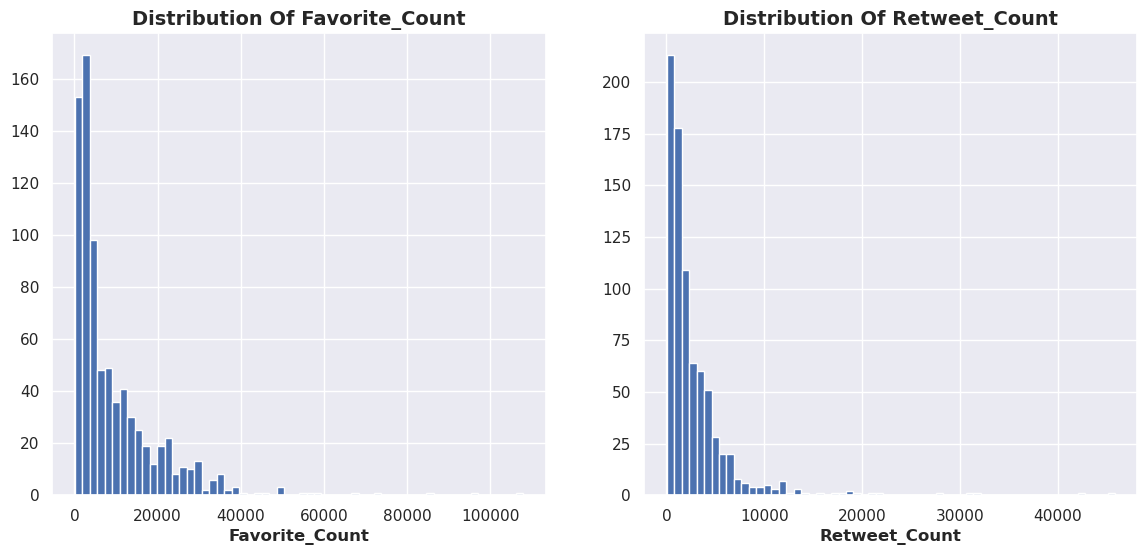

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14,6))

def plot_hist(ax, xvar, data, color=None):
    """Function to plot hitograms in a specific axes"""
    ax.hist(x=xvar, data=data, bins=60, color=color)
    ax.set_xlabel(f'{xvar}'.title(), fontsize=12, weight="bold")
    ax.set_title(f'Distribution of {xvar}'.title(), fontsize=14, weight="bold")    
    
plot_hist(ax[0], 'favorite_count', cleaned_tweets)
plot_hist(ax[1], 'retweet_count', cleaned_tweets)
plt.show()

As we see there the data in the favorite count and retweet count colums is right skewed, that means there are many small values in the data.

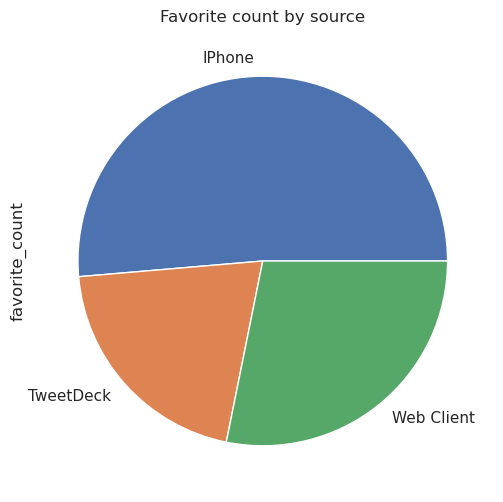

In [44]:
fig, ax = plt.subplots(figsize=(14,6))

cleaned_tweets.groupby('source').favorite_count.mean().plot.pie()
ax.set_title('Favorite count by source')
plt.show()

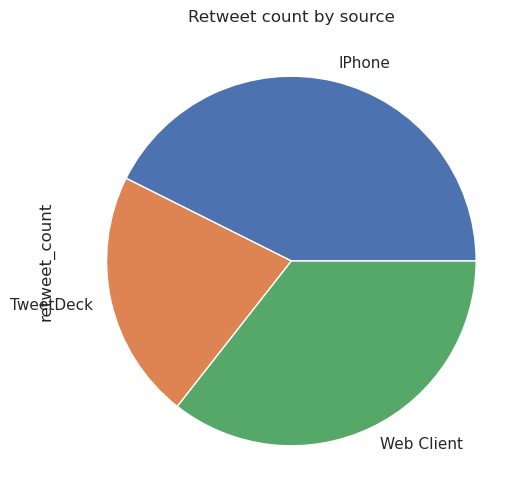

In [46]:
fig, ax = plt.subplots(figsize=(14,6))

cleaned_tweets.groupby('source').retweet_count.mean().plot.pie()
ax.set_title('Retweet count by source')
plt.show()

In average the tweets posted by IPhone are popular than the other sources but there are quiet close in retweets. So we can say that are IPhone tweets are getting more likes and they are more popular.

#### Other suggestions:

Merging the 2 rates columns into one column and then we delete the 2 columns, [with this tutorial](https://sparkbyexamples.com/pandas/pandas-combine-two-columns-of-text-in-dataframe/#:~:text=By%20use%20%2B%20operator%20simply%20you,does%20addition%20instead%20of%20concatenation.).

In [ ]:
# main_clean["rate"] = main_clean['rating_numerator'].astype(str) +"/"+ main_clean["rating_denominator"].astype(str)

In [ ]:
# main_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

[Markdown tutorials](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html), [images in markdown](https://stackoverflow.com/questions/41604263/how-do-i-display-local-image-in-markdown).